### **Import Libraries & Setup**

In [87]:
# Import Library
import pandas as pd
import numpy as np
import os 
from src.utils import extract_multi_csv
from config.setting import PRODUCTS_PATH

### **Data Ingestion**

In [88]:
# Ingest Data
file_list = os.listdir(PRODUCTS_PATH)

# Extract Data Product
df_product_original = extract_multi_csv(PRODUCTS_PATH)

# Membuat Staging Area
df_products = df_product_original.copy()
df_products.drop(columns='Unnamed: 0', inplace=True)

# Preview Data
df_products.head()


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


### **Data Overview**

In [89]:
# Menampilkan nama kolom di Dataset 'df_product'
df_products.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [90]:
# Menampilkan ringkasan informasi Dataset 'df_product'
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   name            1103170 non-null  object
 1   main_category   1103170 non-null  object
 2   sub_category    1103170 non-null  object
 3   image           1103170 non-null  object
 4   link            1103170 non-null  object
 5   ratings         751582 non-null   object
 6   no_of_ratings   751582 non-null   object
 7   discount_price  980844 non-null   object
 8   actual_price    1067544 non-null  object
dtypes: object(9)
memory usage: 75.7+ MB


In [91]:
# Mengecek Missing values per kolom
df_products.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
dtype: int64

In [92]:
# Preview 10 data baris awal
df_products.head(10)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
5,Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41TuyxwZ9m...,https://www.amazon.in/Voltas-Adjustable-173V-V...,4.0,"1,666","₹31,990","₹70,990"
6,Lloyd 1.0 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31IXlxIPsO...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"1,097","₹29,999","₹49,990"
7,Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31IXlxIPsO...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.3,"1,494","₹39,990","₹67,990"
8,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51sTXvsanQ...,https://www.amazon.in/Carrier-Flexicool-Invert...,4.1,674,"₹30,990","₹58,190"
9,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51WQ3nWF0v...,https://www.amazon.in/Voltas-Inverter-Split-Co...,4.0,801,"₹37,999","₹73,990"


In [93]:
# Preview 10 data baris akhir
df_products.tail(10)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
1103160,"Just Rider Compression Clothing (XXL, Black)",sports & fitness,Yoga,https://m.media-amazon.com/images/I/51-Vbeesll...,https://www.amazon.in/Just-Rider-Compression-C...,3.0,2,₹228,₹799
1103161,PANCHTATAVA Yoga Mat Cover with Adjustable Sho...,sports & fitness,Yoga,https://m.media-amazon.com/images/I/61BZWeiaGQ...,https://www.amazon.in/PANCHTATAVA-Cover-Adjust...,4.5,2,₹245,"₹1,499"
1103162,"Obsessions Reversible Printed Yoga Mat,Anti-Sl...",sports & fitness,Yoga,https://m.media-amazon.com/images/I/71F9HFeoIQ...,https://www.amazon.in/Obsessions-Printed-Yoga-...,NaN,NaN,"₹1,320","₹1,650"
1103163,Puma Women Sweatshirt,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51An1bABW1...,https://www.amazon.in/Puma-Womens-Sweatshirt-5...,NaN,NaN,"₹1,439","₹2,999"
1103164,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,https://m.media-amazon.com/images/I/61voQ68VuT...,https://www.amazon.in/Be-savage-Purple-Hoodie-...,4.6,6,₹711,₹999
1103165,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
1103166,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
1103167,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
1103168,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN
1103169,Mothercare Printed Cotton Elastane Girls Infan...,sports & fitness,Yoga,https://m.media-amazon.com/images/I/814X-sI3DB...,https://www.amazon.in/Mothercare-Carrot-Regula...,4.6,5,"₹1,039","₹1,299"


### **Data Cleaning & Handling Missing**


Tahap ini dilakukan untuk memastikan kualitas data sebelum analisis. Proses meliputi pembersihan nilai tidak valid, penanganan data yang hilang, serta standarisasi format agar lebih konsisten. Dengan data yang bersih, hasil analisis akan lebih akurat dan dapat diandalkan.


In [94]:
# Identifikasi nilai unik pada kolom 'ratings'
df_products['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99', 4.0, 3.7, 3.4, 4.1, 3.8, 3.6, 4.2,
       3.9, 3.2, 3.5, 5.0, 3.3, 2.6, 4.5, 4.3, 4.7, 3.0, 3.1, 4.4, 4.6,
       1.0, 4.9, 2.9, 2.7, 2.2, 2.5, 4.8, 2.0, 1.7, 1.9, 2.8, 2.4, 1.6,
       2.3, 1.8, 1.4, 1.3, 2.1, 1.5], dtype=object)

Kolom **`ratings`** masih berisi data yang tidak seragam, seperti teks non-numerik ("FREE", "Get") dan nilai berbentuk mata uang ("₹68.99", "₹100"), serta campuran tipe string dan float. Agar dapat dianalisis, kolom ini perlu dibersihkan dengan menghapus nilai tidak valid, membatasi hanya angka dalam rentang 1.0–5.0, lalu mengubahnya ke format numerik `float`.

In [95]:
# Konversi 'ratings' dari object ke numeric (float), nilai non-valid diubah jadi NaN
df_products['ratings'] = pd.to_numeric(df_products['ratings'], errors='coerce').astype(float)

In [96]:
# Validasi hasil konversi
df_products['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, nan, 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.5, 1. , 2.6,
       2.8, 2.3, 1.7, 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2. , 1.4, 2.1, 1.2,
       1.3, 1.5, 1.1])

sama halnya dengan kolom 'no_of_ratings' perlu di format dari 'object' menjadi 'numeric'

In [97]:
# Konversi 'no_of_ratings' ke numeric dengan menghapus koma, isi NaN dengan 0, lalu ubah ke tipe Int64
df_products['no_of_ratings'] = pd.to_numeric(df_products['no_of_ratings'].str.replace(",", ""),errors='coerce')
df_products['no_of_ratings'] = df_products['no_of_ratings'].fillna(0)
df_products['no_of_ratings'] = df_products['no_of_ratings'].astype('Int64')

In [98]:
# Preview kolom sebelum transformasi
print("actual_price :", df_products['actual_price'].unique())
print("discount_price :", df_products['discount_price'].unique())

actual_price : ['₹58,990' '₹75,990' '₹61,990' ... '₹608.97' '₹4,792' '₹8,023.60']
discount_price : ['₹32,999' '₹46,490' '₹34,490' ... '₹3,712.10' '₹1,429.60' '₹651.01']


Dataset memiliki dua kolom utama terkait harga:  

- **`discount_price`** → harga produk setelah diskon, masih dalam format string dengan simbol mata uang (`₹`) dan tanda pemisah ribuan (`,`).  
- **`actual_price`** → harga asli produk sebelum diskon, juga masih berupa string dengan simbol mata uang dan pemisah ribuan.  

Agar dapat dianalisis lebih lanjut, diperlukan beberapa langkah pembersihan data:  

1. Membuat kolom baru bernama **`currency`** untuk menyimpan simbol mata uang `₹`.  
2. Menghapus simbol mata uang dan tanda pemisah ribuan dari kolom harga.  
3. Mengonversi nilai harga ke tipe numerik (`float64`).  

Dengan cara ini, informasi harga tetap terjaga dan analisis lintas mata uang dapat dilakukan dengan lebih fleksibel.  

Kolom discount_price masih berisi nilai harga dalam format string yang disertai simbol mata uang (₹) serta tanda pemisah ribuan (,). Kondisi ini membuat kolom belum bisa diolah sebagai data numerik. Agar dapat dianalisis, langkah yang perlu dilakukan adalah membersihkan data dengan cara menghapus simbol mata uang dan tanda pemisah, lalu mengonversinya ke tipe numerik (float64). Dengan begitu, nilai harga dapat digunakan untuk perhitungan statistik maupun analisis perbandingan harga.

In [ ]:
# Bersihkan kolom harga: hapus simbol mata uang/karakter, lalu ubah ke numeric
# Discount_Price
df_products['discount_price'] = pd.to_numeric(df_products['discount_price'].str.replace(r'[₹,]','', regex=True),errors='coerce')

# Actual Price
df_products['currency']= df_products['actual_price'].str[:1] # membuat kolom baru currency "₹"
df_products['actual_price'] = df_products['actual_price'].str.replace(r'[₹,]','', regex=True).astype(float)

Setelah dianalisis, ternyata memang beberapa row memiliki harga 0, kita akan mengubahnya untuk menjadi NaN.

In [ ]:

# Ganti nilai 0 pada 'actual_price' menjadi NaN untuk menandai data hilang
df_products['actual_price'] = df_products['actual_price'].replace(0,np.nan)

In [ ]:
# Buat kolom 'discount_percentage'
df_products['discount_percentage'] = ((df_products['actual_price'] - df_products['discount_price']) / df_products['actual_price'] * 100).round(1)

In [ ]:
# Tampilkan preview hasil akhir setelah cleaning
df_products.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,currency,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0,₹,44.1
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0,₹,38.8
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490.0,61990.0,₹,44.4
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0,₹,44.9
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0,₹,49.1


## **Product Data Demography**  

Pada bagian ini dilakukan pemetaan awal terhadap dataset produk untuk memahami
**distribusi kategori, harga, diskon, dan rating**. Analisis ini memberikan gambaran
umum tentang karakteristik data sebelum masuk ke tahap insight bisnis yang lebih dalam.

In [ ]:
# Preview jumlah baris dan kolom
df_products.shape

(1103170, 11)

In [ ]:
# Daftar kolom yang tersedia pada dataset
df_products.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'currency',
       'discount_percentage'],
      dtype='object')

In [ ]:
# Informasi overview dataset
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   name                 1103170 non-null  object 
 1   main_category        1103170 non-null  object 
 2   sub_category         1103170 non-null  object 
 3   image                1103170 non-null  object 
 4   link                 1103170 non-null  object 
 5   ratings              739116 non-null   float64
 6   no_of_ratings        1103170 non-null  Int64  
 7   discount_price       980844 non-null   float64
 8   actual_price         1067538 non-null  float64
 9   currency             1067544 non-null  object 
 10  discount_percentage  980844 non-null   float64
dtypes: Int64(1), float64(4), object(6)
memory usage: 93.6+ MB


In [ ]:
# melihat value kolom 'main_category' untuk melihat variasi kategori produk
df_products['main_category'].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

**Top 10 Categories by Number of Products (Bar Chart)**

In [ ]:
# Top 10 kategori dengan jumlah produk terbanyak
(
df_products.groupby('main_category')
    .agg(total_product=("name","count"))
    .sort_values("total_product",ascending=False)
    .head(10)
)

,total_product
main_category,
accessories,232282
men's clothing,153312
women's clothing,153024
"tv, audio & cameras",137318
men's shoes,114912
appliances,66192
stores,65806
home & kitchen,29136
kids' fashion,26976


<Axes: title={'center': 'Distribusi Main Category'}, xlabel='main_category'>

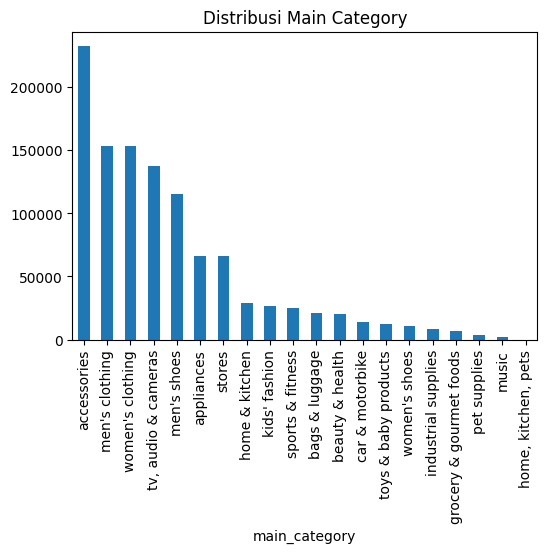

In [ ]:
# Visualisasi distribusi main_category dalam bentuk bar chart
df_products['main_category'].value_counts().plot(kind='bar', figsize=(6,4), title="Distribusi Main Category")

dari hasil analisis terlihat Kategori terbesar adalah **Accessories (232k)**, **Men’s Clothing (153k)**,
dan **Women’s Clothing (153k)**. Hal ini menunjukkan pasar fashion & aksesoris
sangat kompetitif. Sebaliknya, kategori **Kids’ Fashion (26k)** dan
**Sports & Fitness (25k)** masih relatif kecil, sehingga memiliki peluang
pertumbuhan lebih tinggi.

**Average Price per Category (Top 10 by Price)**

In [ ]:
# Top 10 kategori berdasarkan rata-rata harga produk
(
df_products.groupby('main_category')
    .agg(avg_price=("actual_price","mean"))
    .sort_values("avg_price",ascending=False)
    .head(10).round(2)
)

,avg_price
main_category,
home & kitchen,685834.56
accessories,8136.31
appliances,8132.09
sports & fitness,8084.12
"tv, audio & cameras",5725.72
music,5621.82
stores,4959.77
"home, kitchen, pets",4468.12
bags & luggage,4047.91


Kategori dengan harga rata-rata tertinggi adalah **Home & Kitchen** (~685k),
disusul oleh **Accessories** dan **Appliances** (8k–9k). 
Menariknya, kategori fashion seperti **Men’s Shoes** justru berada lebih rendah
(~3.8k), menandakan produk fashion relatif lebih terjangkau dibanding kategori premium.


**Average Discount per Category (Top 10 by Discount %)**

In [ ]:
# Top 10 kategori berdasarkan rata-rata tingkat diskon
(
df_products.groupby("main_category")
    .agg(avg_discount_rate=("discount_percentage","mean"))
    .sort_values("avg_discount_rate", ascending=False)
    .head(10).round(1)
)

,avg_discount_rate
main_category,
women's clothing,59.6
accessories,52.9
stores,51.9
bags & luggage,50.3
"tv, audio & cameras",48.8
home & kitchen,48.2
sports & fitness,48.0
car & motorbike,46.9
men's clothing,46.4


**Discount Distribution**

In [ ]:
# Statistik deskriptif untuk kolom harga (actual_price dan discount_price)
df_products[['actual_price','discount_price']].describe()


,actual_price,discount_price
count,1.067538e+06,9.808440e+05
mean,2.311141e+04,2.623161e+03
std,1.355085e+07,9.458191e+03
min,4.000000e+00,8.000000e+00
25%,9.900000e+02,3.890000e+02
50%,1.599000e+03,6.790000e+02
75%,2.999000e+03,1.399000e+03
max,9.900000e+09,1.249990e+06


Secara umum, produk memiliki harga rata-rata **23,111** dengan diskon harga rata-rata
sekitar **2,623**. Namun, terdapat nilai ekstrem (outlier) seperti harga produk hingga
9,8 miliar, yang kemungkinan besar disebabkan oleh kesalahan input atau data anomali.


**Ratings Distribution**

In [ ]:
# Statistik deskriptif untuk kolom 'ratings'
df_products['ratings'].describe()

count    739116.000000
mean          3.832311
std           0.756101
min           1.000000
25%           3.500000
50%           3.900000
75%           4.300000
max           5.000000
Name: ratings, dtype: float64


Analisis demografi produk menunjukkan bahwa kategori **Accessories, Men’s Clothing, dan Women’s Clothing** mendominasi jumlah produk, sehingga pasar fashion dan aksesoris terlihat sangat kompetitif. Sebaliknya, kategori seperti **Kids’ Fashion** dan **Sports & Fitness** masih relatif kecil, yang membuka peluang penetrasi pasar dengan tingkat persaingan yang lebih rendah. Dari sisi harga, kategori premium seperti **Home & Kitchen** memiliki rata-rata harga yang jauh lebih tinggi dibandingkan produk fashion yang cenderung lebih terjangkau, menegaskan adanya perbedaan positioning antar kategori.

Diskon produk rata-rata berada di angka **2.6k** dari harga asli sekitar 23k, namun terdapat outlier ekstrem dengan harga mencapai miliaran yang kemungkinan merupakan error data dan perlu ditangani dalam tahap data quality. Sementara itu, distribusi rating memperlihatkan mayoritas produk berada pada rentang **3.5–4.3** dengan rata-rata **3.8**, yang menunjukkan bahwa secara umum produk dalam dataset ini mendapatkan penilaian positif dari konsumen.
